# Plot Overall Base and Fine-tune Model Performance on All Datasets

Data overview:
  model_type dataset_tag                  model_name  eval_accuracy  \
0       Base   LibreEval                 Qwen 2 1.5b       0.435830   
1       Base   LibreEval                 gpt-4o-mini       0.824913   
2       Base   LibreEval                      gpt-4o       0.946283   
3       Base   LibreEval               gpt-3.5-turbo       0.758130   
4       Base   LibreEval  claude-3-5-sonnet-20241022       0.924506   

   eval_precision  eval_recall  eval_f1_score  eval_total_samples  \
0        0.206806     0.045957       0.075202                3444   
1        0.965776     0.673066       0.793281                3444   
2        0.942841     0.949971       0.946392                3444   
3        0.743407     0.787086       0.764623                3444   
4        0.964354     0.881326       0.920973                3444   

   eval_correct_predictions  
0                      1501  
1                      2841  
2                      3259  
3                      

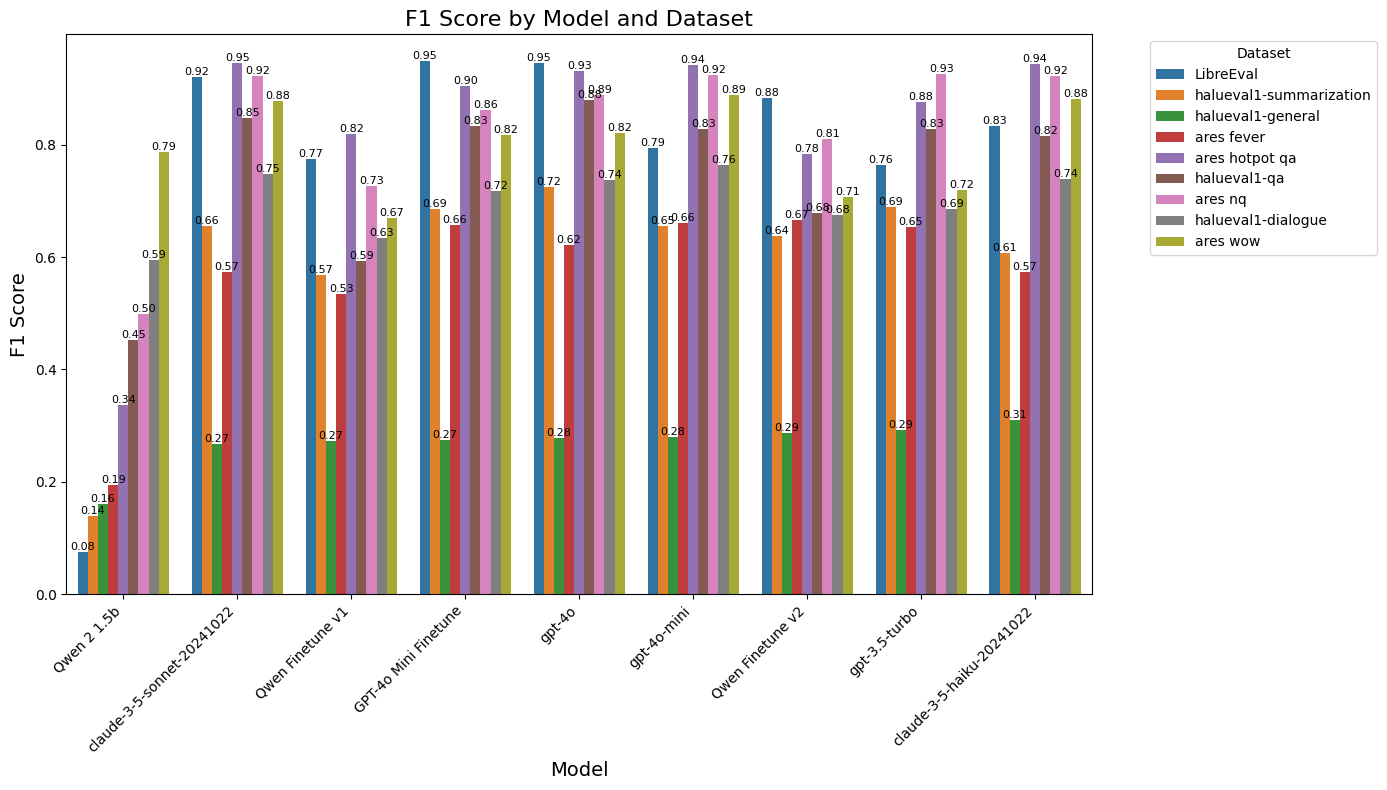

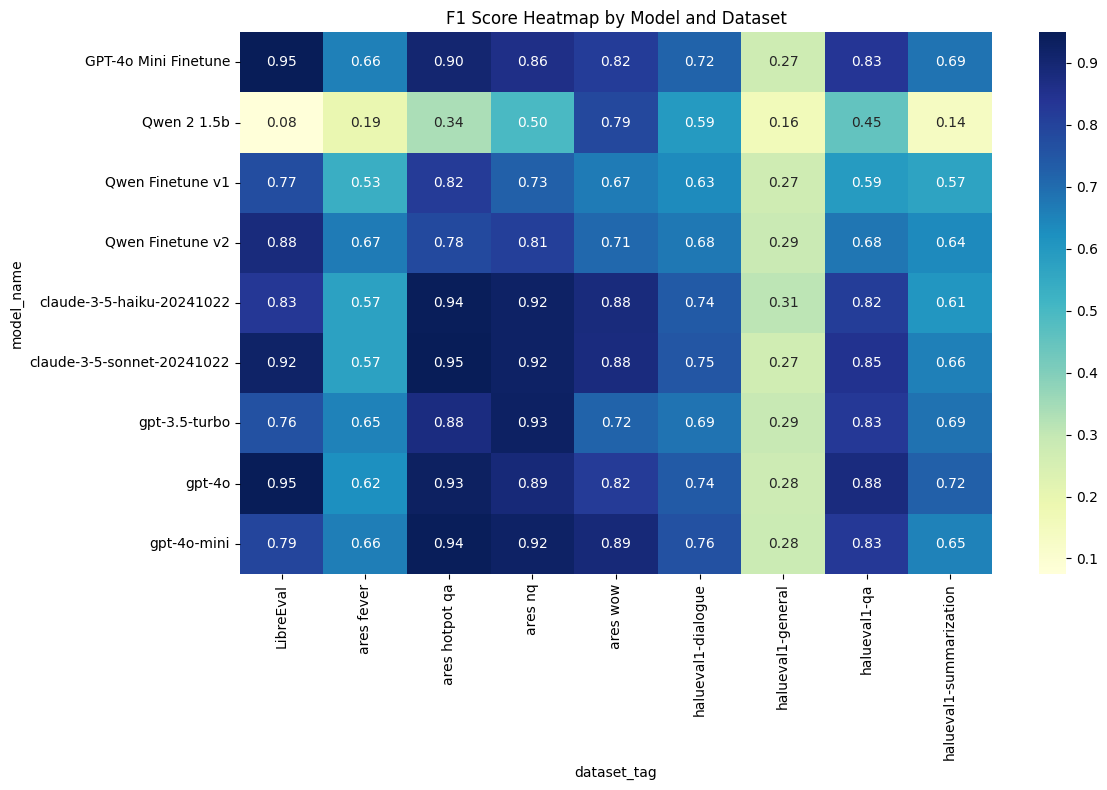

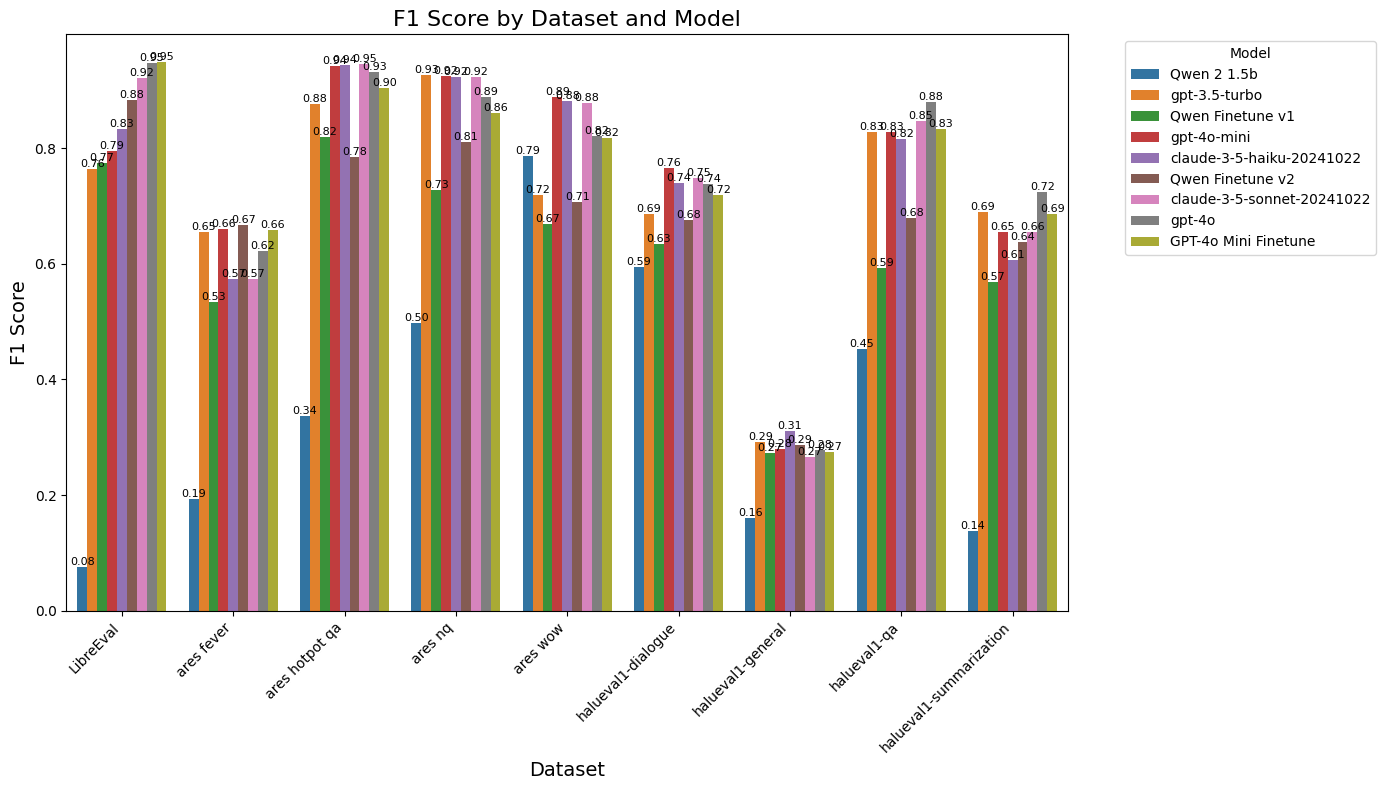

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('./OpenEvals-results-trimmed.csv')

df['model_name'] = df['model_name'].replace('Qwen2-1.5B-Instruct-9fc30309', 'Qwen 2 1.5b')
df['model_name'] = df['model_name'].replace('ArizeAI/Qwen2-1.5B-Instruct-1b7ae98e-b6b45d02', 'Qwen Finetune v1')
df['model_name'] = df['model_name'].replace('ArizeAI/Qwen2-1.5B-Instruct-885cb19a-21805d18', 'Qwen Finetune v2')
df['model_name'] = df['model_name'].replace('ft:gpt-4o-mini-2024-07-18:arize-ai:jg-3-1:B6F3o8d5', 'GPT-4o Mini Finetune')
df["dataset_tag"] = df["dataset_tag"].replace("openeval", "LibreEval")

# Check the data
print("Data overview:")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nUnique models:", df['model_name'].unique())
print("\nUnique datasets:", df['dataset_tag'].unique())

# Group by model and dataset, and calculate mean f1 score
grouped_df = df.groupby(['model_name', 'dataset_tag'])['eval_f1_score'].mean().reset_index()

# Create a figure with appropriate size
plt.figure(figsize=(14, 8))

# Sort the data by F1 score within each dataset group
grouped_df_sorted = grouped_df.sort_values(['eval_f1_score','dataset_tag'])

# Create the grouped bar chart with sorted data
ax = sns.barplot(x='model_name', y='eval_f1_score', hue='dataset_tag', data=grouped_df_sorted, 
                order=grouped_df_sorted['model_name'].unique())

# Customize the plot
plt.title('F1 Score by Model and Dataset', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

# Adjust layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Create a heatmap for another visualization of the same data
plt.figure(figsize=(12, 8))
pivot_df = grouped_df.pivot(index='model_name', columns='dataset_tag', values='eval_f1_score')
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('F1 Score Heatmap by Model and Dataset')
plt.tight_layout()
plt.show()

# Create a flipped version of the graph - grouping by dataset first
plt.figure(figsize=(14, 8))

# Create the grouped bar chart with dataset on x-axis and model as the hue
flipped_grouped_df = df.groupby(['dataset_tag', 'model_name'])['eval_f1_score'].mean().reset_index()

# Sort the data by F1 score within each dataset group
flipped_grouped_df_sorted = flipped_grouped_df.sort_values(['dataset_tag', 'eval_f1_score'])

# Create the bar chart with sorted data
ax = sns.barplot(x='dataset_tag', y='eval_f1_score', hue='model_name', data=flipped_grouped_df_sorted,
                order=flipped_grouped_df_sorted['dataset_tag'].unique())

# Customize the plot
plt.title('F1 Score by Dataset and Model', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

# Adjust layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()



# Plot Base and Fine-tune Model Performance on SubSplits of the LibreEval Dataset

In [ ]:
# Read in the CSV file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
file_path = '/Users/jgilhuly/Documents/dev/GitHub/dataset-generation-research/utils/dataset-analysis/OpenEval_Sub_Split_Results.csv'
df_results = pd.read_csv(file_path)

df_results['model_name'] = df_results['model_name'].replace('Qwen2-1.5B-Instruct-9fc30309', 'Qwen 2 1.5b')
df_results['model_name'] = df_results['model_name'].replace('ArizeAI/Qwen2-1.5B-Instruct-1b7ae98e-b6b45d02', 'Qwen Finetune v1')
df_results['model_name'] = df_results['model_name'].replace('ArizeAI/Qwen2-1.5B-Instruct-885cb19a-21805d18', 'Qwen Finetune v2')
df_results['model_name'] = df_results['model_name'].replace('ft:gpt-4o-mini-2024-07-18:arize-ai:jg-3-1:B6F3o8d5', 'GPT-4o Mini Finetune')

## 1. Compare English vs Non-English (F1 Score and Accuracy side by side)

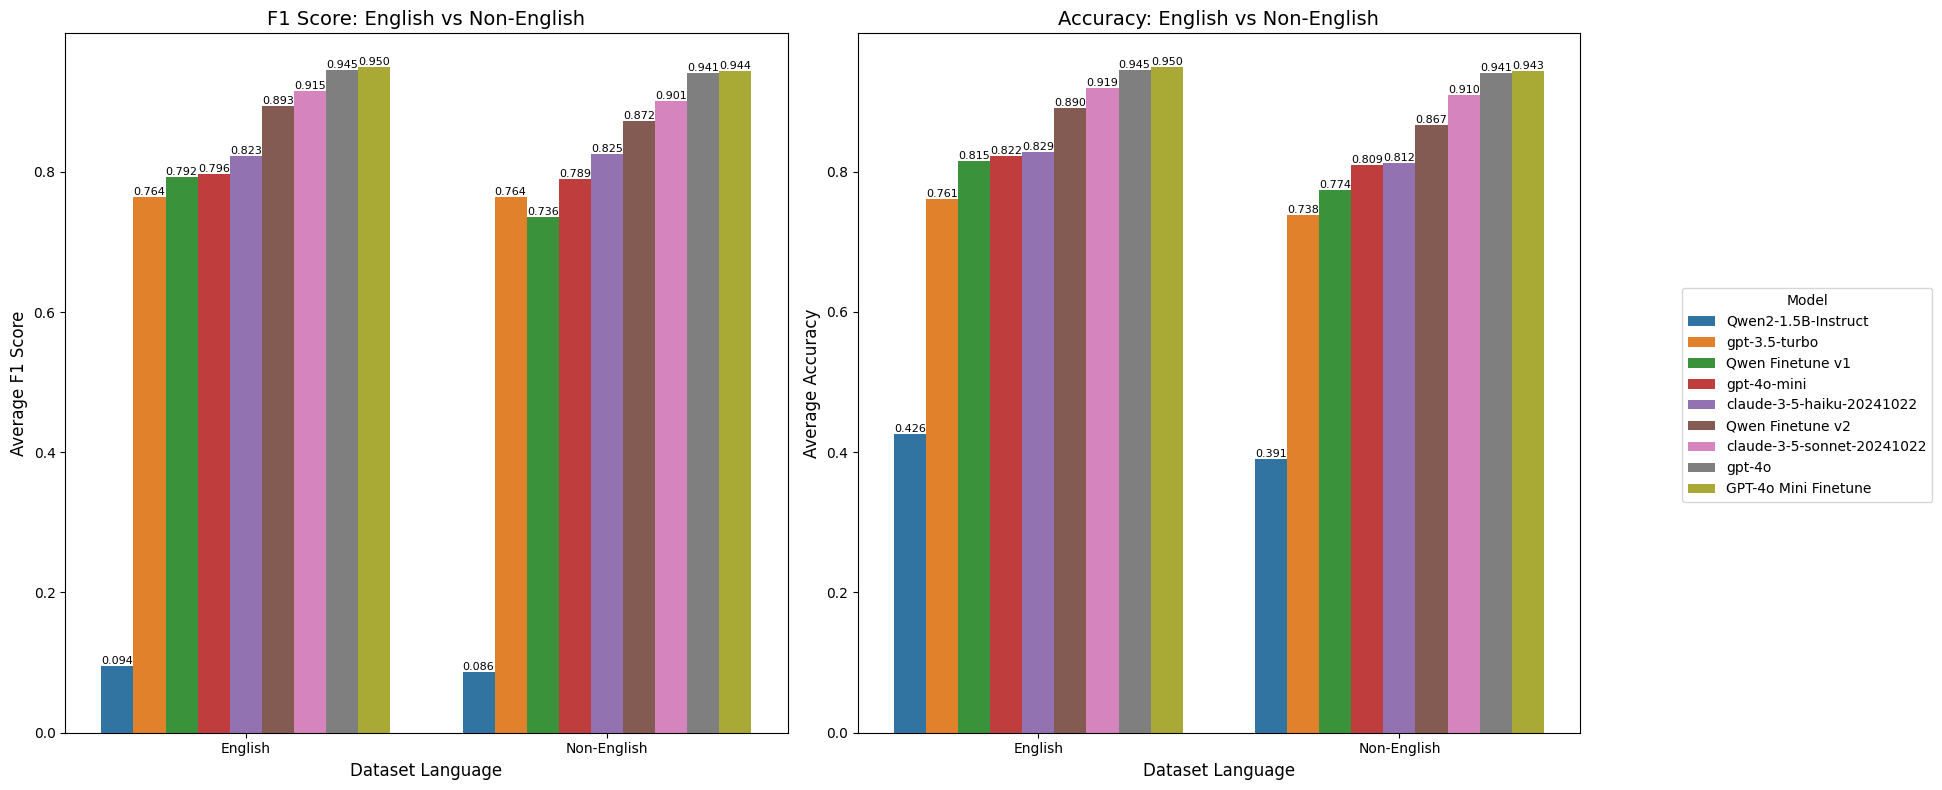

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Create a new column to categorize datasets
df_results['language_category'] = df_results['dataset_tag'].apply(lambda x: 'English' if x == 'english' else 'Non-English')

# F1 Score plot
lang_f1_df = df_results.groupby(['language_category', 'model_name'])['eval_f1_score'].mean().reset_index()
lang_f1_df = lang_f1_df.sort_values(['language_category', 'eval_f1_score'])
ax1 = sns.barplot(x='language_category', y='eval_f1_score', hue='model_name', data=lang_f1_df, 
                 order=lang_f1_df['language_category'].unique(), ax=axes[0])
axes[0].set_title('F1 Score: English vs Non-English', fontsize=14)
axes[0].set_xlabel('Dataset Language', fontsize=12)
axes[0].set_ylabel('Average F1 Score', fontsize=12)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', fontsize=8)

# Accuracy plot
lang_acc_df = df_results.groupby(['language_category', 'model_name'])['eval_accuracy'].mean().reset_index()
lang_acc_df = lang_acc_df.sort_values(['language_category', 'eval_accuracy'])
ax2 = sns.barplot(x='language_category', y='eval_accuracy', hue='model_name', data=lang_acc_df, 
                 order=lang_acc_df['language_category'].unique(), ax=axes[1])
axes[1].set_title('Accuracy: English vs Non-English', fontsize=14)
axes[1].set_xlabel('Dataset Language', fontsize=12)
axes[1].set_ylabel('Average Accuracy', fontsize=12)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.3f', fontsize=8)

# Remove individual legends and add a single legend for the figure
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Model', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()


## 2. Compare Synthetic vs Non-Synthetic (F1 Score, Accuracy, Precision, and Recall side by side)

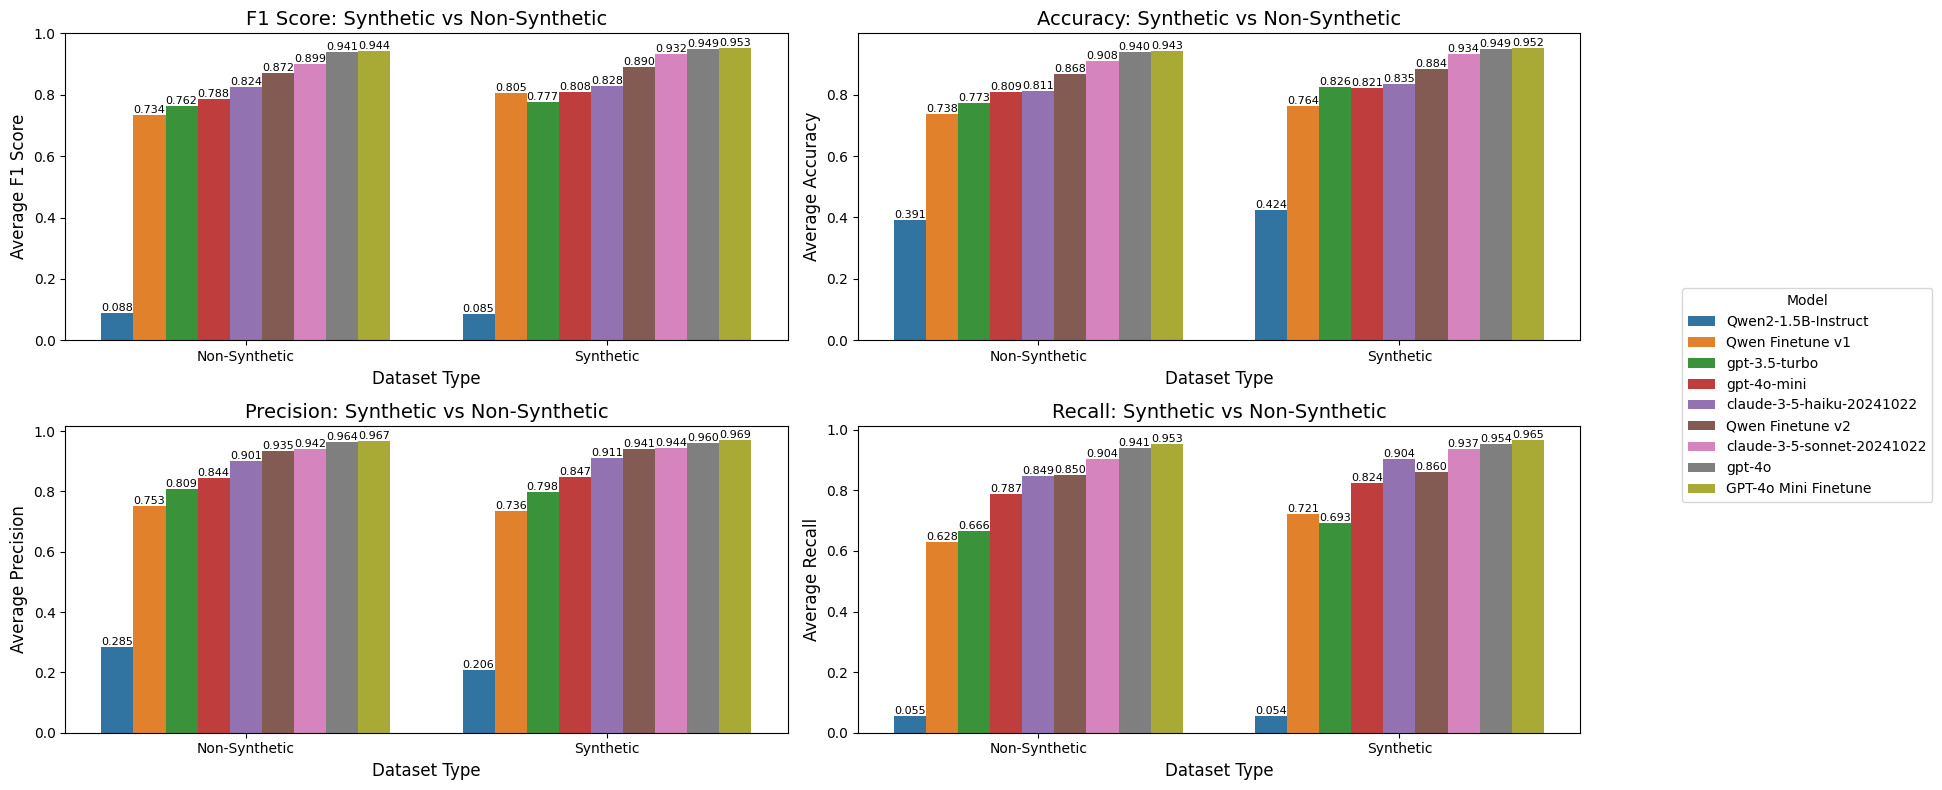

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Create a new column to categorize datasets
df_results['synthetic_category'] = df_results['dataset_tag'].apply(lambda x: 'Synthetic' if x == 'synthetic' else 'Non-Synthetic')

# F1 Score plot
synth_f1_df = df_results.groupby(['synthetic_category', 'model_name'])['eval_f1_score'].mean().reset_index()
synth_f1_df = synth_f1_df.sort_values(['synthetic_category', 'eval_f1_score'])
ax1 = sns.barplot(x='synthetic_category', y='eval_f1_score', hue='model_name', data=synth_f1_df, 
                 order=synth_f1_df['synthetic_category'].unique(), ax=axes[0, 0])
axes[0, 0].set_title('F1 Score: Synthetic vs Non-Synthetic', fontsize=14)
axes[0, 0].set_xlabel('Dataset Type', fontsize=12)
axes[0, 0].set_ylabel('Average F1 Score', fontsize=12)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', fontsize=8)

# Accuracy plot
synth_acc_df = df_results.groupby(['synthetic_category', 'model_name'])['eval_accuracy'].mean().reset_index()
synth_acc_df = synth_acc_df.sort_values(['synthetic_category', 'eval_accuracy'])
ax2 = sns.barplot(x='synthetic_category', y='eval_accuracy', hue='model_name', data=synth_acc_df, 
                 order=synth_acc_df['synthetic_category'].unique(), ax=axes[0, 1])
axes[0, 1].set_title('Accuracy: Synthetic vs Non-Synthetic', fontsize=14)
axes[0, 1].set_xlabel('Dataset Type', fontsize=12)
axes[0, 1].set_ylabel('Average Accuracy', fontsize=12)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.3f', fontsize=8)

# Precision plot
synth_prec_df = df_results.groupby(['synthetic_category', 'model_name'])['eval_precision'].mean().reset_index()
synth_prec_df = synth_prec_df.sort_values(['synthetic_category', 'eval_precision'])
ax3 = sns.barplot(x='synthetic_category', y='eval_precision', hue='model_name', data=synth_prec_df, 
                 order=synth_prec_df['synthetic_category'].unique(), ax=axes[1, 0])
axes[1, 0].set_title('Precision: Synthetic vs Non-Synthetic', fontsize=14)
axes[1, 0].set_xlabel('Dataset Type', fontsize=12)
axes[1, 0].set_ylabel('Average Precision', fontsize=12)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.3f', fontsize=8)

# Recall plot
synth_recall_df = df_results.groupby(['synthetic_category', 'model_name'])['eval_recall'].mean().reset_index()
synth_recall_df = synth_recall_df.sort_values(['synthetic_category', 'eval_recall'])
ax4 = sns.barplot(x='synthetic_category', y='eval_recall', hue='model_name', data=synth_recall_df, 
                 order=synth_recall_df['synthetic_category'].unique(), ax=axes[1, 1])
axes[1, 1].set_title('Recall: Synthetic vs Non-Synthetic', fontsize=14)
axes[1, 1].set_xlabel('Dataset Type', fontsize=12)
axes[1, 1].set_ylabel('Average Recall', fontsize=12)
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.3f', fontsize=8)

# Remove individual legends and add a single legend for the figure
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Model', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

## 3. Compare by Dataset Tag for Question Type Split (F1 Score)

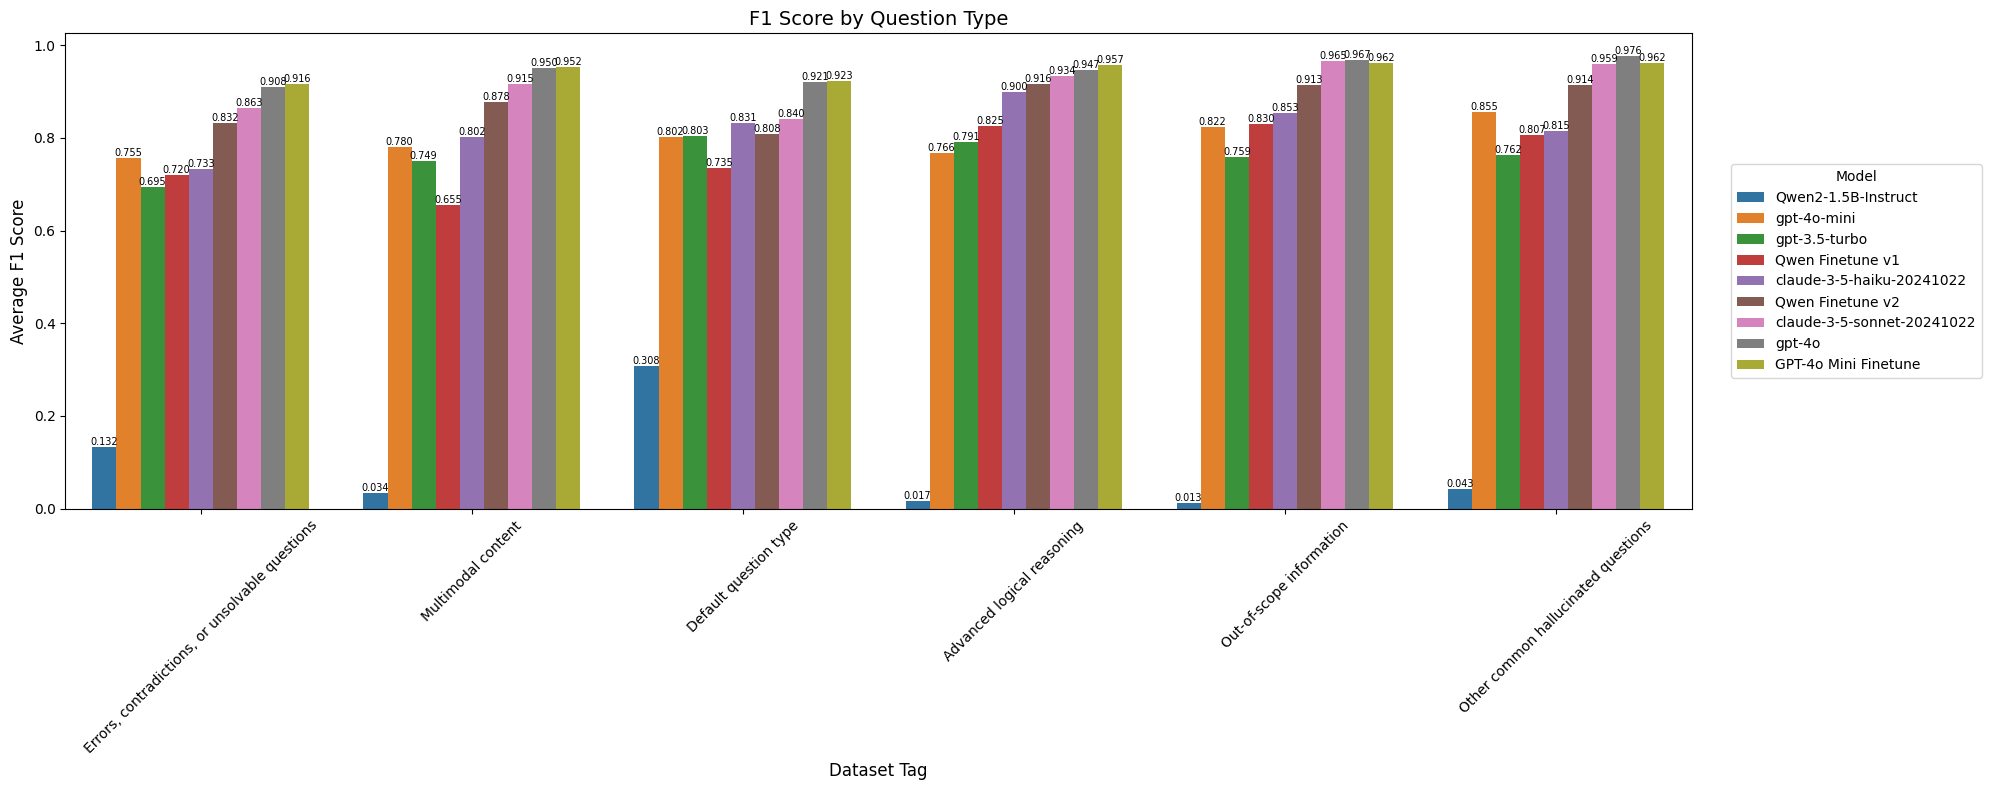

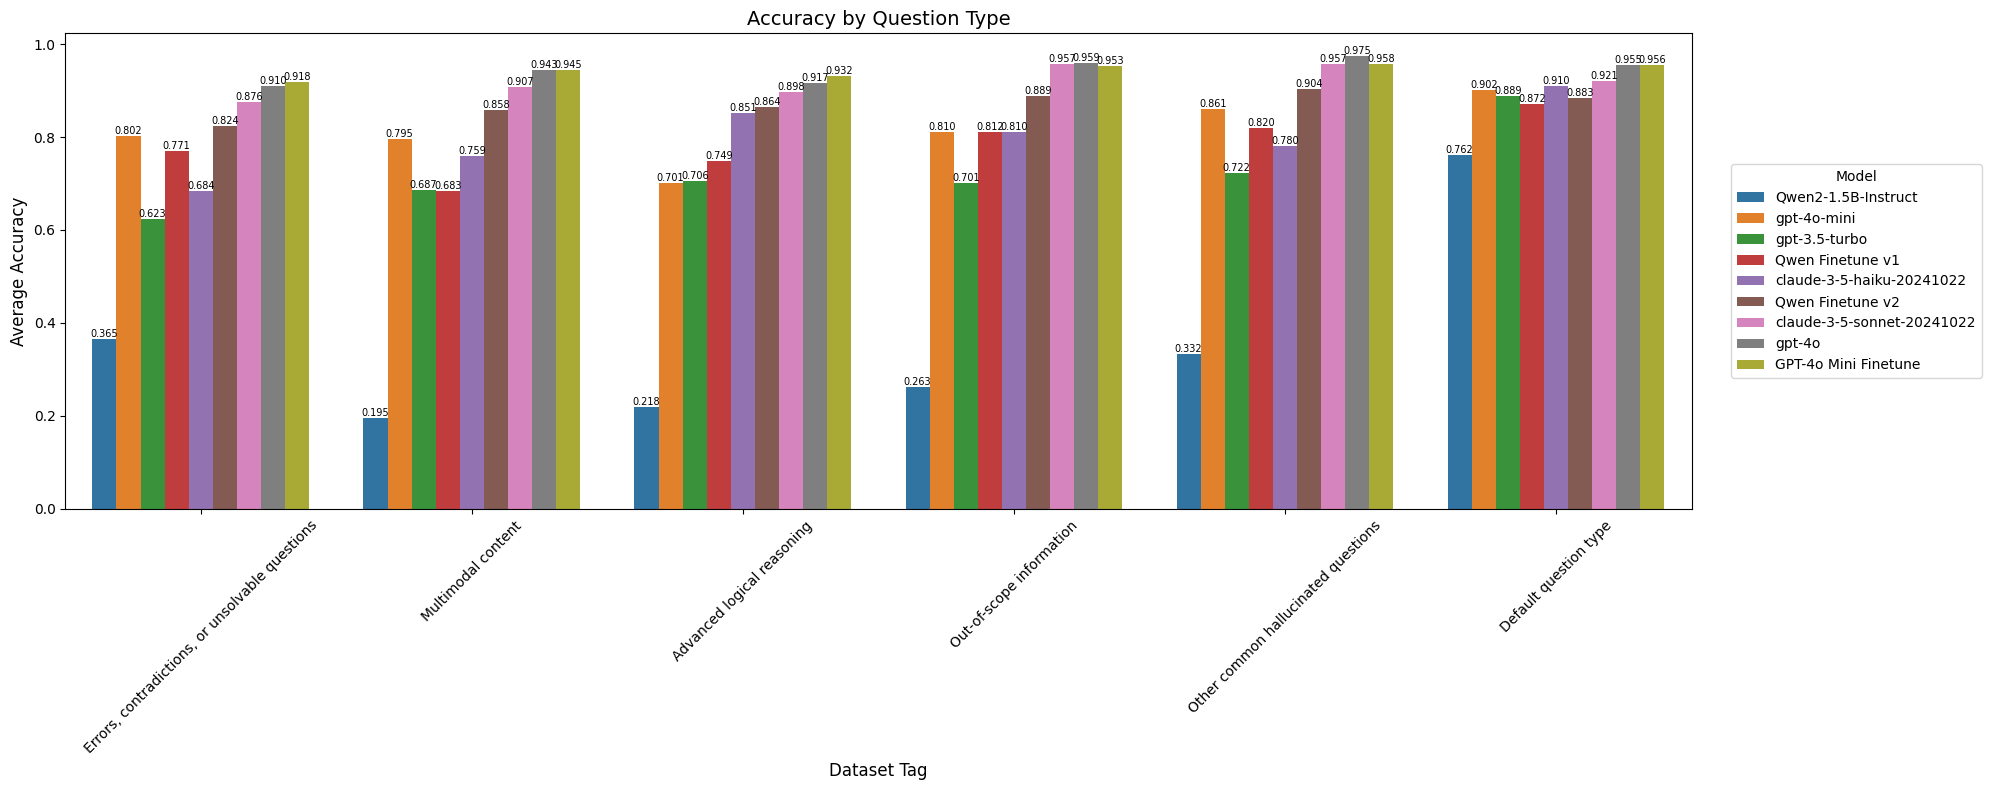

In [10]:
# Filter data for question type splits
question_type_df = df_results[df_results['Split type'] == 'question type']

# F1 Score plot
plt.figure(figsize=(20, 8))
tag_f1_df = question_type_df.groupby(['dataset_tag', 'model_name'])['eval_f1_score'].mean().reset_index()
tag_f1_df = tag_f1_df.sort_values(['dataset_tag', 'eval_f1_score'])
dataset_tag_order = tag_f1_df.groupby('dataset_tag')['eval_f1_score'].mean().sort_values().index
ax1 = sns.barplot(x='dataset_tag', y='eval_f1_score', hue='model_name', data=tag_f1_df, order=dataset_tag_order)
plt.title('F1 Score by Question Type', fontsize=14)
plt.xlabel('Dataset Tag', fontsize=12)
plt.ylabel('Average F1 Score', fontsize=12)
plt.tick_params(axis='x', rotation=45, labelsize=10)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', fontsize=7)

plt.legend(title='Model', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()

# Accuracy plot
plt.figure(figsize=(20, 8))
tag_acc_df = question_type_df.groupby(['dataset_tag', 'model_name'])['eval_accuracy'].mean().reset_index()
tag_acc_df = tag_acc_df.sort_values(['dataset_tag', 'eval_accuracy'])
dataset_tag_order = tag_acc_df.groupby('dataset_tag')['eval_accuracy'].mean().sort_values().index
ax2 = sns.barplot(x='dataset_tag', y='eval_accuracy', hue='model_name', data=tag_acc_df, order=dataset_tag_order)
plt.title('Accuracy by Question Type', fontsize=14)
plt.xlabel('Dataset Tag', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.tick_params(axis='x', rotation=45, labelsize=10)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.3f', fontsize=7)

plt.legend(title='Model', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()

## 4. Compare all models on each question type

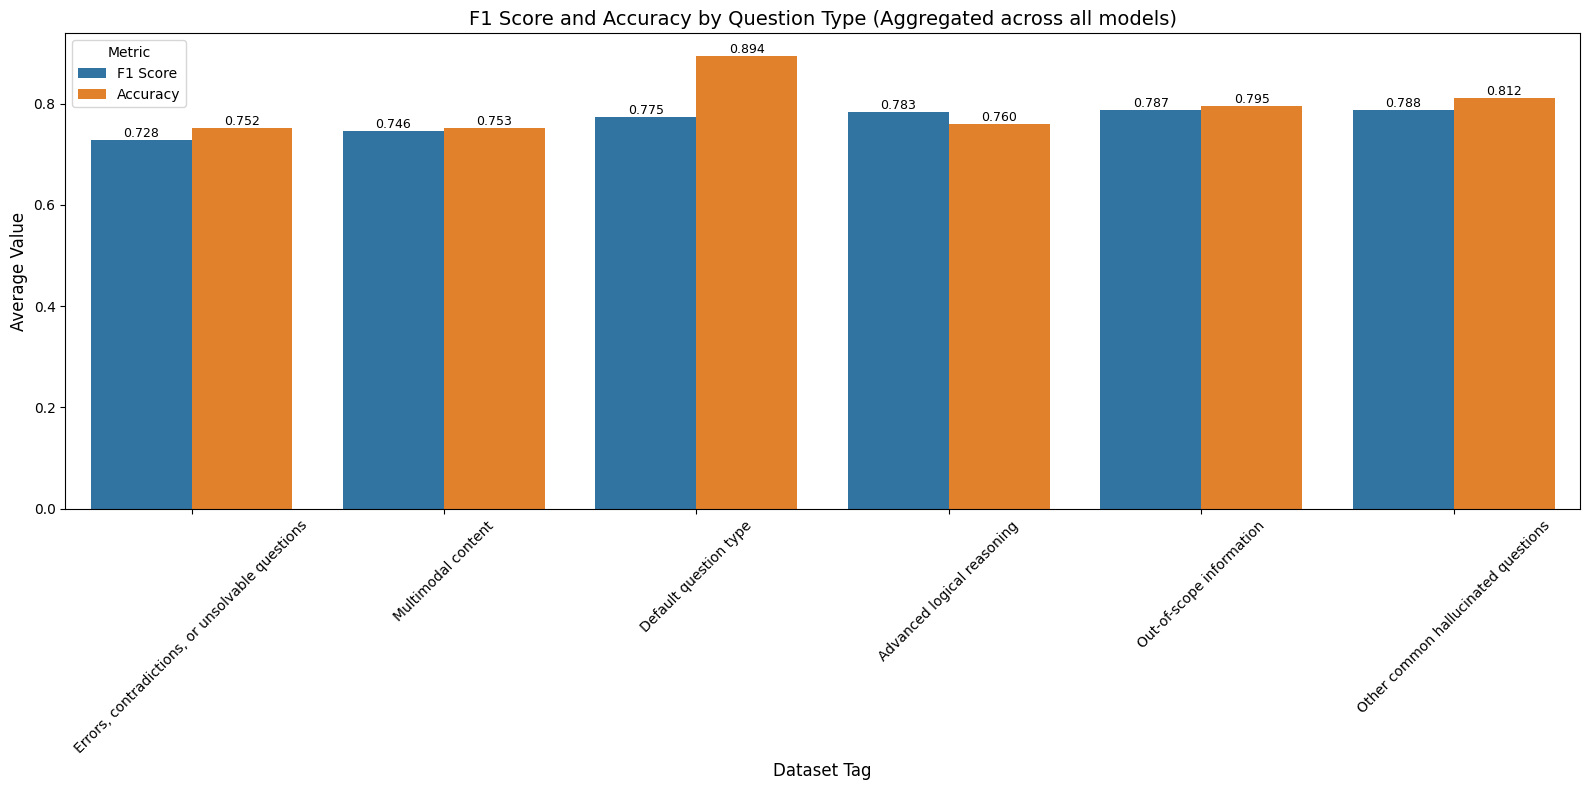

In [9]:
# Filter data for question type splits
question_type_df = df_results[df_results['Split type'] == 'question type']

# Create a figure for the combined metrics
plt.figure(figsize=(16, 8))

# Prepare data
metrics_df = question_type_df.groupby('dataset_tag').agg({
    'eval_f1_score': 'mean',
    'eval_accuracy': 'mean'
}).reset_index()

# Sort by F1 score
metrics_df = metrics_df.sort_values('eval_f1_score')

# Reshape data for seaborn
metrics_long = pd.melt(
    metrics_df, 
    id_vars=['dataset_tag'], 
    value_vars=['eval_f1_score', 'eval_accuracy'],
    var_name='Metric', 
    value_name='Value'
)

# Map metric names to more readable labels
metrics_long['Metric'] = metrics_long['Metric'].map({
    'eval_f1_score': 'F1 Score',
    'eval_accuracy': 'Accuracy'
})

# Create the plot
ax = sns.barplot(x='dataset_tag', y='Value', hue='Metric', data=metrics_long)

# Add labels and title
plt.title('F1 Score and Accuracy by Question Type (Aggregated across all models)', fontsize=14)
plt.xlabel('Dataset Tag', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.tick_params(axis='x', rotation=45, labelsize=10)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=9)

plt.legend(title='Metric', loc='best')
plt.tight_layout()
plt.show()


In [6]:
# Calculate average recall for base models on synthetic vs non-synthetic datasets
base_models_df = df_results[df_results['model_type'] == 'Base']
fine_tuned_models_df = df_results[df_results['model_type'] == 'Fine-tune']

# Function to calculate reductions for a given dataframe
def calculate_reductions(df):
    model_reductions = []
    model_reduction_percentages = []

    for model_name in df['model_name'].unique():
        model_data = df[df['model_name'] == model_name]
        
        # Get recall for synthetic and non-synthetic datasets for this model
        model_synthetic_recall = model_data[model_data['dataset_tag'] == 'synthetic']['eval_recall'].mean()
        model_non_synthetic_recall = model_data[model_data['dataset_tag'] == 'non-synthetic']['eval_recall'].mean()
        
        # Calculate reduction for this model
        model_reduction = model_non_synthetic_recall - model_synthetic_recall
        model_reductions.append(model_reduction)
        
        # Calculate percentage reduction for this model
        if model_non_synthetic_recall != 0:
            model_reduction_percentage = (model_reduction / model_non_synthetic_recall) * 100
        else:
            model_reduction_percentage = 0
        model_reduction_percentages.append(model_reduction_percentage)
    
    # Average the reductions across all models
    avg_reduction = sum(model_reductions) / len(model_reductions) if model_reductions else 0
    avg_reduction_percentage = sum(model_reduction_percentages) / len(model_reduction_percentages) if model_reduction_percentages else 0
    
    # Calculate overall averages
    synthetic_recall = df[df['dataset_tag'] == 'synthetic']['eval_recall'].mean()
    non_synthetic_recall = df[df['dataset_tag'] == 'non-synthetic']['eval_recall'].mean()
    
    return synthetic_recall, non_synthetic_recall, avg_reduction, avg_reduction_percentage

# Calculate for base models
base_synthetic_recall, base_non_synthetic_recall, base_avg_reduction, base_avg_reduction_percentage = calculate_reductions(base_models_df)

# Calculate for fine-tuned models
ft_synthetic_recall, ft_non_synthetic_recall, ft_avg_reduction, ft_avg_reduction_percentage = calculate_reductions(fine_tuned_models_df)

# Print results for base models
print(f"Average recall for base models on synthetic datasets: {base_synthetic_recall:.4f}")
print(f"Average recall for base models on non-synthetic datasets: {base_non_synthetic_recall:.4f}")
print(f"Average absolute reduction in recall for base models (per model): {base_avg_reduction:.4f}")
print(f"Average percentage reduction in recall for base models (per model): {base_avg_reduction_percentage:.2f}%")

# Print results for fine-tuned models
print(f"\nAverage recall for fine-tuned models on synthetic datasets: {ft_synthetic_recall:.4f}")
print(f"Average recall for fine-tuned models on non-synthetic datasets: {ft_non_synthetic_recall:.4f}")
print(f"Average absolute reduction in recall for fine-tuned models (per model): {ft_avg_reduction:.4f}")
print(f"Average percentage reduction in recall for fine-tuned models (per model): {ft_avg_reduction_percentage:.2f}%")


Average recall for base models on synthetic datasets: 0.7148
Average recall for base models on non-synthetic datasets: 0.6002
Average absolute reduction in recall for base models (per model): -0.1146
Average percentage reduction in recall for base models (per model): -22.20%

Average recall for fine-tuned models on synthetic datasets: 0.8743
Average recall for fine-tuned models on non-synthetic datasets: 0.6885
Average absolute reduction in recall for fine-tuned models (per model): -0.1858
Average percentage reduction in recall for fine-tuned models (per model): -43.51%


## 5. Compare all models on Hallucination Type

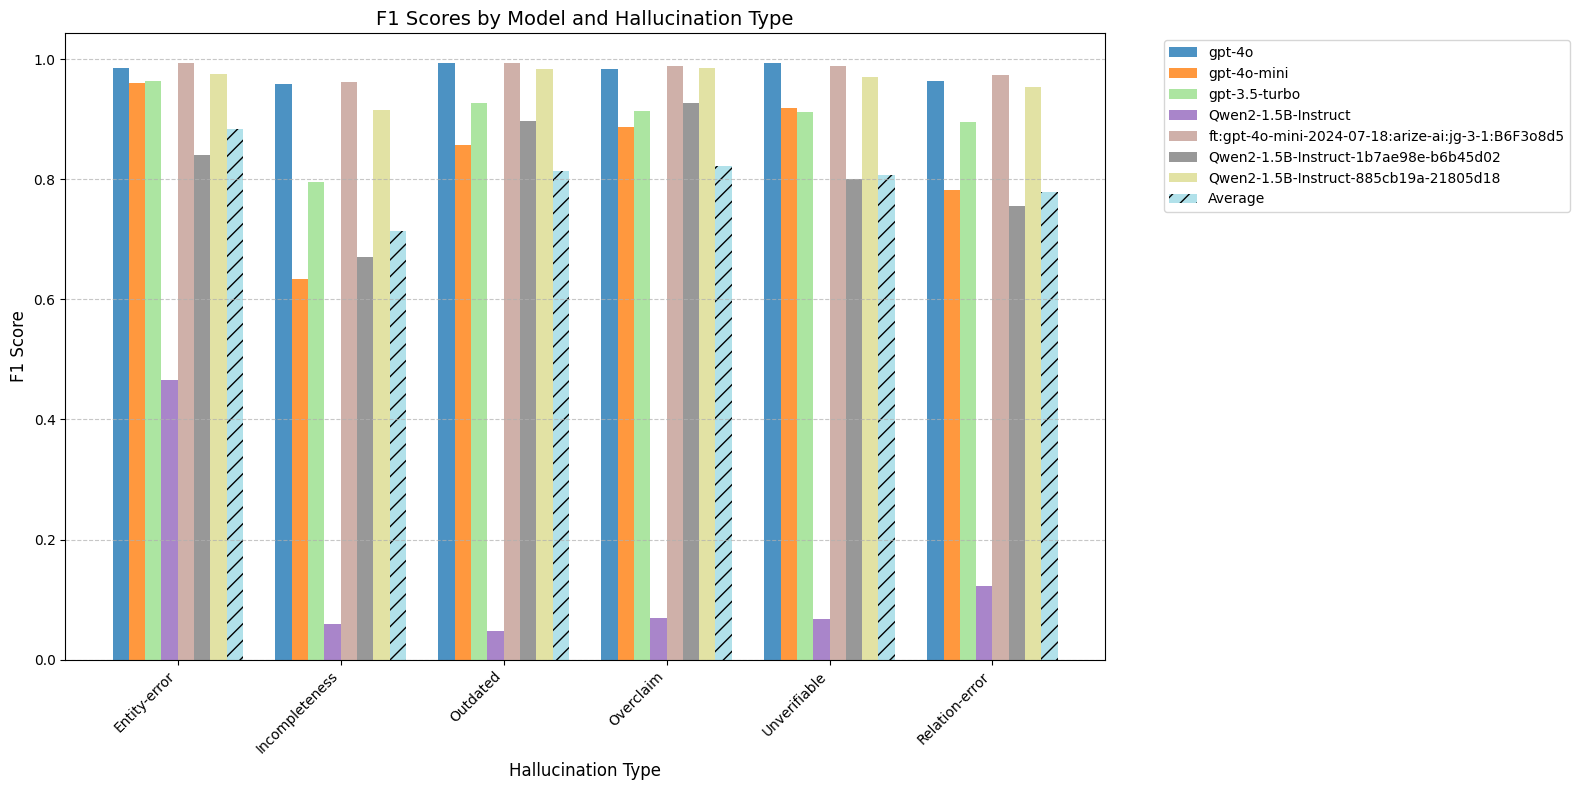

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the hallucination type data
hallucination_df = pd.read_csv('/Users/jgilhuly/Documents/dev/GitHub/dataset-generation-research/utils/dataset-analysis/OpenEval Test Results Hallucination Type Sub Splits.csv')

# Extract unique dataset tags and models
hallucination_types = hallucination_df['dataset_tag'].unique()
models = hallucination_df['model_name'].unique()

# Set up the figure
plt.figure(figsize=(16, 8))

# Calculate the positions for the bars
bar_width = 0.8 / (len(models) + 1)  # +1 for the average bar
positions = np.arange(len(hallucination_types))

# Colors for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(models) + 1))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = hallucination_df[hallucination_df['model_name'] == model]
    f1_scores = []
    
    for h_type in hallucination_types:
        type_data = model_data[model_data['dataset_tag'] == h_type]
        f1_score = type_data['eval_f1_score'].mean() if not type_data.empty else 0
        f1_scores.append(f1_score)
    
    plt.bar(positions + i * bar_width, f1_scores, width=bar_width, 
            label=model, color=colors[i], alpha=0.8)

# Calculate and plot average for each hallucination type
avg_f1_scores = []
for h_type in hallucination_types:
    type_data = hallucination_df[hallucination_df['dataset_tag'] == h_type]
    avg_f1 = type_data['eval_f1_score'].mean() if not type_data.empty else 0
    avg_f1_scores.append(avg_f1)

plt.bar(positions + len(models) * bar_width, avg_f1_scores, width=bar_width,
        label='Average', color=colors[-1], alpha=0.8, hatch='//')

# Customize the plot
plt.xlabel('Hallucination Type', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Scores by Model and Hallucination Type', fontsize=14)
plt.xticks(positions + (len(models) * bar_width) / 2, 
           [h_type.replace('hallucination_', '').replace(' hallucination', '') 
            for h_type in hallucination_types], 
           rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
